In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

# 1) Aquisição dos dados de ações

In [6]:
ticket = yf.Ticker('^BVSP')
#df = ticket.history(period='3y', interval='1d')
df = ticket.history(interval='1d' , start='2021-01-01' , end='2024-01-01')

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0
2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0
2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0
2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0
2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-03:00,130826.0,132277.0,130822.0,132182.0,8681000,0.0,0.0
2023-12-22 00:00:00-03:00,132553.0,133035.0,132094.0,132753.0,8231100,0.0,0.0
2023-12-26 00:00:00-03:00,132753.0,133645.0,132753.0,133533.0,0,0.0,0.0


In [5]:
df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-21 00:00:00-03:00,130826.0,132277.0,130822.0,132182.0,8681000,0.0,0.0
2023-12-22 00:00:00-03:00,132553.0,133035.0,132094.0,132753.0,8231100,0.0,0.0
2023-12-26 00:00:00-03:00,132753.0,133645.0,132753.0,133533.0,0,0.0,0.0
2023-12-27 00:00:00-03:00,133523.0,134195.0,133328.0,134194.0,6168200,0.0,0.0
2023-12-28 00:00:00-03:00,134194.0,134392.0,133832.0,134185.0,7812700,0.0,0.0


# 2) Decomposição de uma série temporal

In [18]:
df[['Close']].head()

,Close
Date,
2021-01-04 00:00:00-03:00,118558.0
2021-01-05 00:00:00-03:00,119223.0
2021-01-06 00:00:00-03:00,119851.0
2021-01-07 00:00:00-03:00,121956.0
2021-01-08 00:00:00-03:00,125077.0


In [12]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

<AxesSubplot:xlabel='Date'>

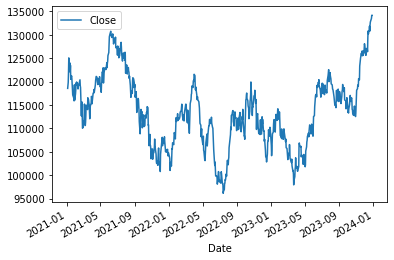

In [22]:
df[['Close']].plot()

In [26]:
df['Close'].head()

Date
2021-01-04 00:00:00-03:00    118558.0
2021-01-05 00:00:00-03:00    119223.0
2021-01-06 00:00:00-03:00    119851.0
2021-01-07 00:00:00-03:00    121956.0
2021-01-08 00:00:00-03:00    125077.0
Name: Close, dtype: float64

In [25]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2021-01-04 00:00:00-03:00    118558.0
2021-01-05 00:00:00-03:00    119223.0
2021-01-06 00:00:00-03:00    119851.0
2021-01-07 00:00:00-03:00    121956.0
2021-01-08 00:00:00-03:00    125077.0
                               ...   
2023-12-21 00:00:00-03:00    132182.0
2023-12-22 00:00:00-03:00    132753.0
2023-12-26 00:00:00-03:00    133533.0
2023-12-27 00:00:00-03:00    134194.0
2023-12-28 00:00:00-03:00    134185.0
Length: 745, dtype: float64

In [27]:
decomposicao.trend.iloc[0:5]

Date
2021-01-04 00:00:00-03:00    122362.934341
2021-01-05 00:00:00-03:00    122166.804147
2021-01-06 00:00:00-03:00    121970.673952
2021-01-07 00:00:00-03:00    121774.543757
2021-01-08 00:00:00-03:00    121578.413562
Name: trend, dtype: float64

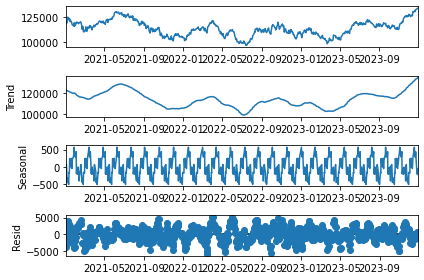

In [30]:
decomposicao.plot();

In [13]:
decomposicao.seasonal

Date
2021-01-04 00:00:00-03:00     66.949041
2021-01-05 00:00:00-03:00   -138.814418
2021-01-06 00:00:00-03:00   -451.639210
2021-01-07 00:00:00-03:00   -318.163336
2021-01-08 00:00:00-03:00   -397.400128
                                ...    
2023-12-21 00:00:00-03:00    289.799773
2023-12-22 00:00:00-03:00    439.359205
2023-12-26 00:00:00-03:00   -200.160697
2023-12-27 00:00:00-03:00    -49.185266
2023-12-28 00:00:00-03:00   -213.648501
Name: seasonal, Length: 745, dtype: float64

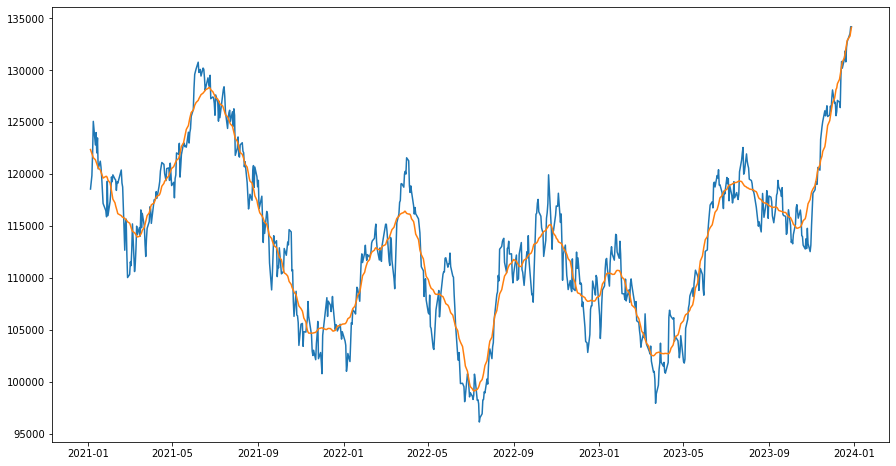

In [17]:
ax, fig = plt.subplots(figsize=[15,8])
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

# 3) Calculo de média móvel

In [18]:
df['Close']

Date
2021-01-04 00:00:00-03:00    118558.0
2021-01-05 00:00:00-03:00    119223.0
2021-01-06 00:00:00-03:00    119851.0
2021-01-07 00:00:00-03:00    121956.0
2021-01-08 00:00:00-03:00    125077.0
                               ...   
2023-12-21 00:00:00-03:00    132182.0
2023-12-22 00:00:00-03:00    132753.0
2023-12-26 00:00:00-03:00    133533.0
2023-12-27 00:00:00-03:00    134194.0
2023-12-28 00:00:00-03:00    134185.0
Name: Close, Length: 745, dtype: float64

In [8]:
df['Close'].rolling(7).mean()

Date
2021-01-04 00:00:00-03:00              NaN
2021-01-05 00:00:00-03:00              NaN
2021-01-06 00:00:00-03:00              NaN
2021-01-07 00:00:00-03:00              NaN
2021-01-08 00:00:00-03:00              NaN
                                 ...      
2023-12-21 00:00:00-03:00    130917.857143
2023-12-22 00:00:00-03:00    131387.571429
2023-12-26 00:00:00-03:00    131772.000000
2023-12-27 00:00:00-03:00    132343.000000
2023-12-28 00:00:00-03:00    132786.000000
Name: Close, Length: 745, dtype: float64

In [9]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

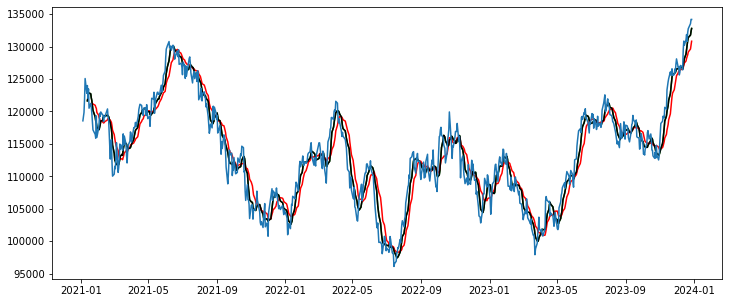

In [10]:
fig, aux = plt.subplots(figsize=(12,5))
plt.plot(media_movel7d, 'green')
plt.plot(media_movel14d, 'red')
plt.plot(media_movel7d, 'black')
plt.plot(df['Close'])

# 4)  Extração de features

In [19]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0
2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0
2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0
2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0
2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0


In [21]:
df.reset_index(inplace=True)

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0
1,2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0
2,2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0
3,2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0
4,2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0


In [24]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0,2021,1,4
1,2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0,2021,1,5
2,2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0,2021,1,6
3,2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0,2021,1,7
4,2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0,2021,1,8


In [26]:
df[['Close']]

,Close
0,118558.0
1,119223.0
2,119851.0
3,121956.0
4,125077.0
...,...
740,132182.0
741,132753.0
742,133533.0
743,134194.0


In [27]:
df['Close'].head()

0    118558.0
1    119223.0
2    119851.0
3    121956.0
4    125077.0
Name: Close, dtype: float64

In [28]:
df['Close'].shift()

0           NaN
1      118558.0
2      119223.0
3      119851.0
4      121956.0
         ...   
740    130804.0
741    132182.0
742    132753.0
743    133533.0
744    134194.0
Name: Close, Length: 745, dtype: float64

In [29]:
df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 -100

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0,2021,1,4,NaN
1,2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0,2021,1,5,0.560907
2,2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0,2021,1,6,0.526744
3,2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0,2021,1,7,1.756347
4,2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0,2021,1,8,2.559120


In [31]:
def features_extraction(df_):
    df_['year'] = df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day'] = df_['Date'].dt.day 
    df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 -100

In [32]:
df.reset_index(inplace=True)

In [33]:
features_extraction(df)

In [34]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,0,2021-01-04 00:00:00-03:00,119024.0,120354.0,118062.0,118558.0,8741400,0.0,0.0,2021,1,4,NaN
1,1,2021-01-05 00:00:00-03:00,118835.0,119790.0,116756.0,119223.0,9257100,0.0,0.0,2021,1,5,0.560907
2,2,2021-01-06 00:00:00-03:00,119377.0,120924.0,118917.0,119851.0,11638200,0.0,0.0,2021,1,6,0.526744
3,3,2021-01-07 00:00:00-03:00,119103.0,121983.0,119101.0,121956.0,11774800,0.0,0.0,2021,1,7,1.756347
4,4,2021-01-08 00:00:00-03:00,122387.0,125324.0,122386.0,125077.0,11085800,0.0,0.0,2021,1,8,2.559120


# Hipótese  1) Existe um mês melhor pra investir no ativo?
        


<AxesSubplot:xlabel='month'>

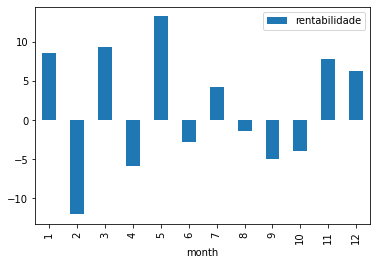

In [35]:
df.groupby('month').agg({'rentabilidade': 'sum'}).plot(kind='bar')

In [37]:
df.set_index('Date', inplace=True)

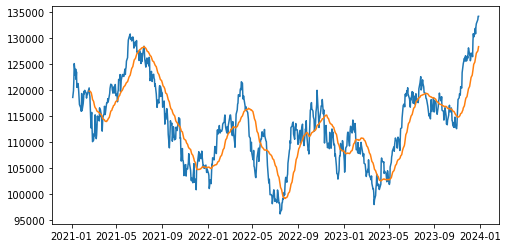

In [38]:
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)